In [1]:
cd /Users/lucamasserano/Desktop/uni/cmu/statComp_36750/assignments-lucamasserano/classification-tree

/Users/lucamasserano/Desktop/uni/cmu/statComp_36750/assignments-lucamasserano/classification-tree


In [2]:
from luCART.classification_tree import tree
from luCART.random_forest import random_forest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Generate synthetic data

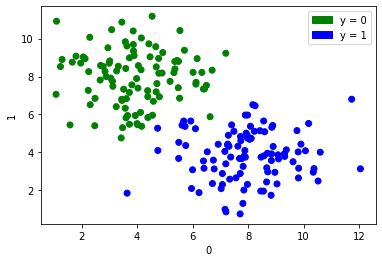

,0,1,y
0,6.390764,7.341065,0
1,4.046415,8.576315,0
2,2.884294,8.002921,0
3,3.998741,5.518445,0
4,5.439186,8.849233,0


In [3]:
def random_data(seed=7, size=200):

    np.random.seed(seed)
    two_dim_normal = pd.DataFrame(
        np.random.multivariate_normal(mean=[4, 8], cov=np.array([[2, 0], [0, 2]]), size=size//2))
    two_dim_normal2 = pd.DataFrame(
        np.random.multivariate_normal(mean=[8, 4], cov=np.array([[2, 0], [0, 2]]), size=size//2))
    two_dim_normal["y"] = 0
    two_dim_normal2["y"] = 1
    synthetic_data = pd.concat([two_dim_normal, two_dim_normal2], axis=0, ignore_index=True)
    synthetic_data.rename(columns={0: "0", 1: "1"}, inplace=True)
    
    colors = {0: "green", 1: "blue"}
    plt.scatter(synthetic_data['0'], synthetic_data['1'], c=synthetic_data.y.apply(lambda x: colors[x]))
    plt.xlabel(xlabel='0')
    plt.ylabel(ylabel='1')
    green_patch = mpatches.Patch(color='green', label="y = 0")
    blue_patch = mpatches.Patch(color='blue', label="y = 1")
    plt.legend(handles=[green_patch, blue_patch])
    plt.show()

    return synthetic_data

synthetic_data = random_data()
synthetic_data.head()

In [4]:
synthetic_data[synthetic_data["0"] < 1.25]

,0,1,y
17,1.080477,7.063565,0
69,1.239486,8.527969,0
97,1.097135,10.918648,0


In [5]:
type(synthetic_data.columns) == pd.Index

True

## Build tree without pruning

In [24]:
test_tree = tree.ClassificationTree(impurity_function="gini",
                                    data_source_type="dataframe")

In [25]:
# without pruning
test_tree.fit(data=synthetic_data, label="y")

In [26]:
test_tree.show(test_tree.root)

root
left:
  1 < 5.7421119018332965
  left:
    0 < 4.452409599160356
    left:
      1 < 3.308528430779547
    right:
      1 >= 3.308528430779547
  right:
    0 >= 4.452409599160356
right:
  1 >= 5.7421119018332965
  left:
    0 < 7.548204542527349
  right:
    0 >= 7.548204542527349


In [27]:
test_tree.keys

{'0 < 4.452409599160356',
 '0 < 7.548204542527349',
 '0 >= 4.452409599160356',
 '0 >= 7.548204542527349',
 '1 < 3.308528430779547',
 '1 < 5.7421119018332965',
 '1 >= 3.308528430779547',
 '1 >= 5.7421119018332965',
 'root'}

In [9]:
test_tree.tree_cardinality

9

In [10]:
len(test_tree.leaves)

5

In [11]:
test_tree.leaves

{'0 >= 4.452409599160356': <luCART.classification_tree.tree.Node at 0x7fb857af2a30>,
 '1 < 3.308528430779547': <luCART.classification_tree.tree.Node at 0x7fb857af2f40>,
 '1 >= 3.308528430779547': <luCART.classification_tree.tree.Node at 0x7fb857b7ec70>,
 '0 < 7.548204542527349': <luCART.classification_tree.tree.Node at 0x7fb857a3e9d0>,
 '0 >= 7.548204542527349': <luCART.classification_tree.tree.Node at 0x7fb857a3e2b0>}

## Build and prune tree

In [28]:
test_tree = tree.ClassificationTree(impurity_function="gini",
                                    data_source_type="dataframe",
                                    alpha=0.01)
test_tree.fit(data=synthetic_data, label="y")

In [21]:
test_tree.show(test_tree.root)

root
left:
  1 < 5.7421119018332965
  left:
    0 < 4.452409599160356
  right:
    0 >= 4.452409599160356
right:
  1 >= 5.7421119018332965
  left:
    0 < 7.548204542527349
  right:
    0 >= 7.548204542527349


In [29]:
test_tree.tree_cardinality

7

In [30]:
len(test_tree.leaves)

4

In [33]:
test_tree.root.children_keys

{'1 < 5.7421119018332965': 'left',
 '1 >= 5.7421119018332965': 'right',
 '0 < 4.452409599160356': 'left',
 '0 >= 4.452409599160356': 'left',
 '0 < 7.548204542527349': 'right',
 '0 >= 7.548204542527349': 'right'}

## Predict

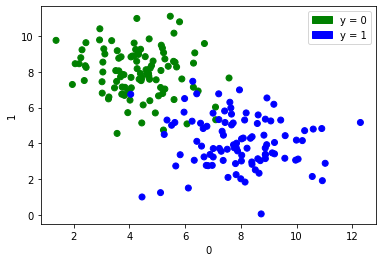

In [59]:
test_data = random_data(seed=1)

In [60]:
predictions = test_tree.predict(new_data=test_data.drop(labels="y", axis=1))

In [61]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0])

In [62]:
np.sum(predictions != test_data["y"])/len(predictions)

0.095

## Cross validation

In [43]:
test_tree = tree.ClassificationTree(impurity_function="gini",
                                    data_source_type="dataframe",
                                    alpha=[0.00001, 0.0001, 0.001, 0.01], 
                                    n_folds=5, debug=True)
test_tree.fit(data=synthetic_data, label="y")

In [46]:
test_tree.alpha_cv

1e-05

In [45]:
test_tree.show(root=test_tree.root)

root
left:
  1 < 5.7421119018332965
  left:
    0 < 4.452409599160356
    left:
      1 < 3.308528430779547
    right:
      1 >= 3.308528430779547
  right:
    0 >= 4.452409599160356
right:
  1 >= 5.7421119018332965
  left:
    0 < 7.548204542527349
  right:
    0 >= 7.548204542527349


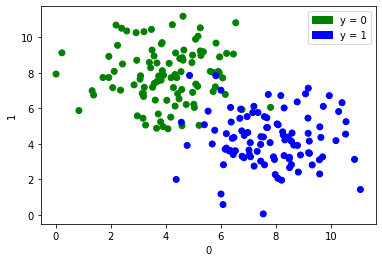

In [40]:
test_data = random_data(seed=150)

In [41]:
predictions = test_tree.predict(new_data=test_data.drop(labels="y", axis=1))

In [42]:
np.sum(predictions != test_data["y"])/len(predictions)

0.06

## Random Forests

In [5]:
synthetic_data

,0,1,y
0,6.390764,7.341065,0
1,4.046415,8.576315,0
2,2.884294,8.002921,0
3,3.998741,5.518445,0
4,5.439186,8.849233,0
...,...,...,...
195,8.225366,5.114116,1
196,6.748357,3.593897,1
197,5.727058,5.375878,1
198,8.054331,4.692713,1


In [18]:
test_random_forest = random_forest.RandomForestClassifier(n_classifiers=10, 
                                                          n_covariates="sqrt", 
                                                          impurity_function="gini",
                                                          data_source_type="dataframe",
                                                          debug=True)

In [19]:
test_random_forest.fit(data=synthetic_data, label="y")

In [20]:
cardinalities = []
for key, tree in test_random_forest.forest.items():
    cardinalities.append(tree["tree_cardinality"])
cardinalities == [33]*10

True

### Predict

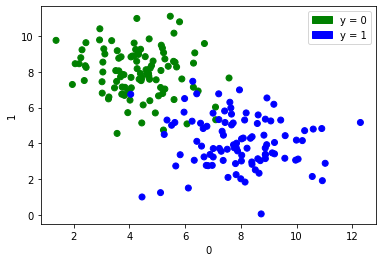

,0,1,y
0,6.297171,7.134846,0
1,3.253052,6.482593,0
2,5.223871,4.745133,0
3,6.467536,6.923491,0
4,4.451189,7.647337,0
5,6.067733,5.086521,0
6,3.544033,7.456865,0
7,5.603392,6.444519,0
8,3.756150,6.758521,0
9,4.059699,8.824225,0


In [21]:
test_data = random_data(seed=1)
test_data.head(15)

In [22]:
predictions = test_random_forest.rf_predict(new_data=test_data.drop(labels="y", axis=1))

#### Need to modify depth of trees when built without pruning to avoid automatic overfitting

In [24]:
np.sum(predictions != test_data["y"])/len(predictions)

0.12

# SQL/DF handling

## Create synthetic_data table on server

In [13]:
import psycopg2

conn = psycopg2.connect(host="", user="", password="", dbname="")
cursor = conn.cursor()

In [7]:
cursor.execute("CREATE TABLE synthetic_data (y integer, x1 real, x2 real);")

In [8]:
rows = [(y, x1, x2) for y, x1, x2 in zip(synthetic_data.y, synthetic_data["0"], synthetic_data["1"])]

In [9]:
cursor.executemany("INSERT INTO synthetic_data (y, x1, x2) VALUES (%s, %s, %s);", rows)

In [10]:
cursor.close()
conn.commit()

In [11]:
conn.close()

## Test

In [6]:
test_tree = tree.ClassificationTree(impurity_function="gini",
                                    data_source_type="SQL")

hostname:  sculptor.stat.cmu.edu
port (press Enter for default):  
username:  ········
password:  ·········
database:  lmassera


Don't forget to close the connection when you are done


In [7]:
test_tree.data_handler.get_covariate_names(label="y", data="synthetic_data")

['x1', 'x2']